In [3]:
import os
import glob
import time
import argparse

# Kerasa / TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
from keras.models import load_model
from layers import BilinearUpSampling2D
from loss import depth_loss_function
from utils import predict, load_images, display_images, evaluate
from matplotlib import pyplot as plt

# Custom object needed for inference and training
from model import DepthEstimate
# Load model into GPU / CPU
print('Loading model...')
model= DepthEstimate()
import tensorflow
from loss import depth_loss_function
batch_size     = 16
learning_rate  = 0.0001
epochs         = 1
optimizer = tensorflow.keras.optimizers.Adam(lr=learning_rate, amsgrad=True)

# Load test data

Loading model...
Base model loaded DenseNet169

Model created.


In [4]:
model.load_weights("training_dense_10/cp.ckpt")
model.compile(optimizer=optimizer)

In [5]:
print('Loading test data...', end='')
import numpy as np
from data import extract_zip
data = extract_zip('nyu_test.zip')
from io import BytesIO
rgb = np.load(BytesIO(data['eigen_test_rgb.npy']))
depth = np.load(BytesIO(data['eigen_test_depth.npy']))
crop = np.load(BytesIO(data['eigen_test_crop.npy']))
print('Test data loaded.\n')
print(np.shape(rgb))
print(np.shape(depth))

Loading test data...Test data loaded.

(654, 480, 640, 3)
(654, 480, 640)


In [2]:

from skimage.transform import resize
rgb1=[]
depth1=[]
for i in range(len(rgb)):
    rgb1.append(resize(rgb[i], (224,224), preserve_range=True, mode='reflect', anti_aliasing=True ))
for j in range(len(depth)):
    depth1.append(resize(depth[j], (224,224), preserve_range=True, mode='reflect', anti_aliasing=True ))
start = time.time()
print(np.shape(rgb1))
print(np.shape(depth1))
print('Testing...')

Loading test data...Test data loaded.

(654, 480, 640, 3)
(654, 480, 640)
(654, 224, 224, 3)
(654, 224, 224)
Testing...


In [6]:
from utils import predict, load_images, display_images, evaluate
e = evaluate(model, rgb, depth, crop, batch_size=1)
print("{:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}".format('a1', 'a2', 'a3', 'rel', 'rms', 'log_10'))
print("{:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}".format(e[0],e[1],e[2],e[3],e[4],e[5]))
end = time.time()

        a1,         a2,         a3,        rel,        rms,     log_10
    0.2773,     0.5490,     0.7717,     0.6414,     1.6572,     0.1979



Loaded (12) images of size (480, 640, 3).


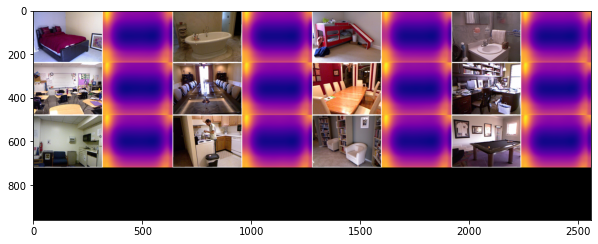

In [4]:
from utils import predict, load_images, display_images
from matplotlib import pyplot as plt
import os
import glob
import argparse
import matplotlib

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('examples/') if isfile(join('examples/',f))]


inputs = load_images(onlyfiles)
print('\nLoaded ({0}) images of size {1}.'.format(inputs.shape[0], inputs.shape[1:]))

# Compute results
outputs = predict(model, inputs)

#matplotlib problem on ubuntu terminal fix
#matplotlib.use('TkAgg')   

# Display results
viz = display_images(outputs.copy(), inputs.copy())
plt.figure(figsize=(10,5))
plt.imshow(viz)
plt.savefig('test.png')
plt.show()

In [5]:
'''
import os
import glob
import argparse
import matplotlib

# Keras / TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
from keras.models import load_model
from layers import BilinearUpSampling2D
from utils import predict, load_images, display_images
from matplotlib import pyplot as plt

# Argument Parser
parser = argparse.ArgumentParser(description='High Quality Monocular Depth Estimation via Transfer Learning')
parser.add_argument('--model', default='nyu.h5', type=str, help='Trained Keras model file.')
parser.add_argument('--input', default='examples/*.png', type=str, help='Input filename or folder.')
args = parser.parse_args()

# Custom object needed for inference and training
custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}

print('Loading model...')

# Load model into GPU / CPU
model = load_model(args.model, custom_objects=custom_objects, compile=False)

print('\nModel loaded ({0}).'.format(args.model))

# Input images
inputs = load_images( glob.glob(args.input) )
print('\nLoaded ({0}) images of size {1}.'.format(inputs.shape[0], inputs.shape[1:]))

# Compute results
outputs = predict(model, inputs)

#matplotlib problem on ubuntu terminal fix
#matplotlib.use('TkAgg')   

# Display results
viz = display_images(outputs.copy(), inputs.copy())
plt.figure(figsize=(10,5))
plt.imshow(viz)
plt.savefig('test.png')
plt.show()
'''

"\nimport os\nimport glob\nimport argparse\nimport matplotlib\n\n# Keras / TensorFlow\nos.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'\nfrom keras.models import load_model\nfrom layers import BilinearUpSampling2D\nfrom utils import predict, load_images, display_images\nfrom matplotlib import pyplot as plt\n\n# Argument Parser\nparser = argparse.ArgumentParser(description='High Quality Monocular Depth Estimation via Transfer Learning')\nparser.add_argument('--model', default='nyu.h5', type=str, help='Trained Keras model file.')\nparser.add_argument('--input', default='examples/*.png', type=str, help='Input filename or folder.')\nargs = parser.parse_args()\n\n# Custom object needed for inference and training\ncustom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}\n\nprint('Loading model...')\n\n# Load model into GPU / CPU\nmodel = load_model(args.model, custom_objects=custom_objects, compile=False)\n\nprint('\nModel loaded ({0}).'.format(args.model))\n\n# I